In [184]:
import pandas as pd
import numpy as np
import copy

# Read in our Data

In [185]:
season_stats = pd.read_csv("clean_data/season_stats.csv")
teams = pd.read_csv("clean_data/teams.csv")
ncaa_games = pd.read_csv("clean_data/ncaa_games.csv")
schools = pd.read_csv("clean_data/schools.csv")


tournament_stats = pd.read_csv("tournament_data/prelim_data.csv")


# Build our Feature vector

In [186]:
# make a new dataframe:
data_matrix = ncaa_games.copy()

In [187]:
def build_feat_vec(r):
    """ 
    This function builds the feature vec by subtracting team_1's stats from team_2's stats
    """
    s1 = season_stats[season_stats["team_id"] == r["team_1_id"] ]
    s2 = season_stats[season_stats["team_id"] == r["team_2_id"] ]
    # reset the indices: this is important for subtraction
    s2 = s2.reset_index(drop=True)
    s1 = s1.reset_index(drop=True)   
    # subtract the two stat sets
    s3 = s1.sub(s2) 
    s3 = s3.iloc[0]
    # append the difference to the game information
    r = r.append(s3)
    # somehow return the information.
    return r
data_matrix = data_matrix.apply(build_feat_vec , axis = 1)

we can get rid of the team_id columns because of the game_id. 
we will use the scores to create a binary: 0 if team 1 loses, 1 if team 1 wins


In [188]:
# Build the result column
data_matrix["result"] = np.where(data_matrix['team_1_score'] > data_matrix['team_2_score'], 1, 0)

In [189]:
# remove unwanted columns
data_matrix = data_matrix.drop(["team_1_id" , "team_2_id" , "team_id" , "team_1_score" , "team_2_score"] , axis = 1)

### Ideas: 
* Should we normalize these differences? 
* Should we normalize the teams before doing the differences?

# Feature Engineering

* Do we want to create any new variable?
* For now, lets simply reduce any overlap (i.e. FT = FTA * FT%)
    + We do not need all three

In [190]:
data_matrix = data_matrix.drop(["game_id" , "FT" , "2P" , "3P" , "FG" , "TRB"] , axis = 1)
tournament_stats = tournament_stats.drop([ "FT" , "2P" , "3P" , "FG" , "TRB"] , axis = 1)

In [191]:
tournament_stats.rename(columns = {'opp_PPG': 'PTS.1'})

,Team,FGA,FG%,2PA,2P%,3PA,3P%,FTA,FT%,ORB,...,STL,BLK,TOV,PF,PTS/G,W-L%,SRS,SOS,PTS.1,Seed
0,kansas,1758,0.484,1180,0.553,578,0.344,616,0.667,333,...,237,145,396,454,74.6,0.903,25.01,11.68,60.7,1
1,san-diego-state,1820,0.468,1055,0.532,765,0.380,519,0.771,297,...,221,88,344,534,74.8,0.938,18.35,3.90,59.5,2
2,maryland,1774,0.419,1009,0.501,765,0.311,669,0.747,348,...,142,134,350,463,71.8,0.774,17.82,10.49,64.5,3
3,kentucky,1723,0.461,1265,0.504,458,0.343,703,0.797,300,...,162,153,387,568,74.4,0.806,15.72,7.40,66.1,4
4,butler,1687,0.460,1066,0.529,621,0.341,496,0.728,280,...,165,82,349,519,68.5,0.710,15.59,9.17,62.1,5
5,auburn,1868,0.433,1044,0.533,824,0.306,818,0.674,421,...,199,151,399,596,78.0,0.806,15.01,7.36,70.4,6
6,west-virginia,1833,0.422,1291,0.479,542,0.286,742,0.642,470,...,238,111,447,572,70.3,0.677,18.49,10.62,62.4,7
7,saint-marys-ca,1879,0.480,1199,0.529,680,0.393,564,0.752,257,...,224,66,325,544,75.5,0.788,12.48,4.67,66.4,8
8,oklahoma,1808,0.420,1104,0.486,704,0.318,565,0.766,259,...,190,135,345,415,70.2,0.613,13.50,10.67,67.4,9
9,texas-tech,1724,0.452,1093,0.508,631,0.355,594,0.754,279,...,239,124,423,545,71.9,0.581,16.81,8.39,63.5,10


In [192]:
data_matrix.columns

Index(['FGA', 'FG%', '2PA', '2P%', '3PA', '3P%', 'FTA', 'FT%', 'ORB', 'DRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS/G', 'W-L%', 'SRS', 'SOS',
       'PTS.1', 'Seed', 'result'],
      dtype='object')

# Decision Tree Classifier

#### Hyperparameters
* https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680
* Rafael Gomes Mantovani, Tomáš Horváth, Ricardo Cerri, Sylvio Barbon Junior, Joaquin Vanschoren, André Carlos Ponce de Leon Ferreira de Carvalho, “An empirical study on hyperparameter tuning of decision trees” arXiv:1812.02207 " 

In [218]:
# put the hyperparameters we will tune here
depth = 13     # 13 is the default
mss = 20       # best range for CART = 1 - 40
msl = 15       # best range for CART = 1-20


In [219]:
from sklearn.model_selection import train_test_split
# split the data
Y = data_matrix.iloc[: , -1]
X = data_matrix.iloc[: , :-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [220]:
from sklearn import tree
# Build Classifier
model = tree.DecisionTreeClassifier(max_depth = depth , min_samples_split = mss , min_samples_leaf = msl)

# fit the classifier
model.fit(x_train, y_train)

#make predictions
predicted_results = model.predict(x_test)

In [221]:
print(model.tree_.max_depth)


6


In [222]:
predicted_results


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1])

In [223]:
y_test.values

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1])

In [224]:
model.score(x_train, y_train)

0.8512241054613936

In [225]:
model.score(x_test , y_test)

0.7368421052631579

# Linear Regression 
in this section, we will assume there exists a linear relationship y = wx. We want to optimize. <dir> First, lets create a correlation matrix and see what linear relationships exist

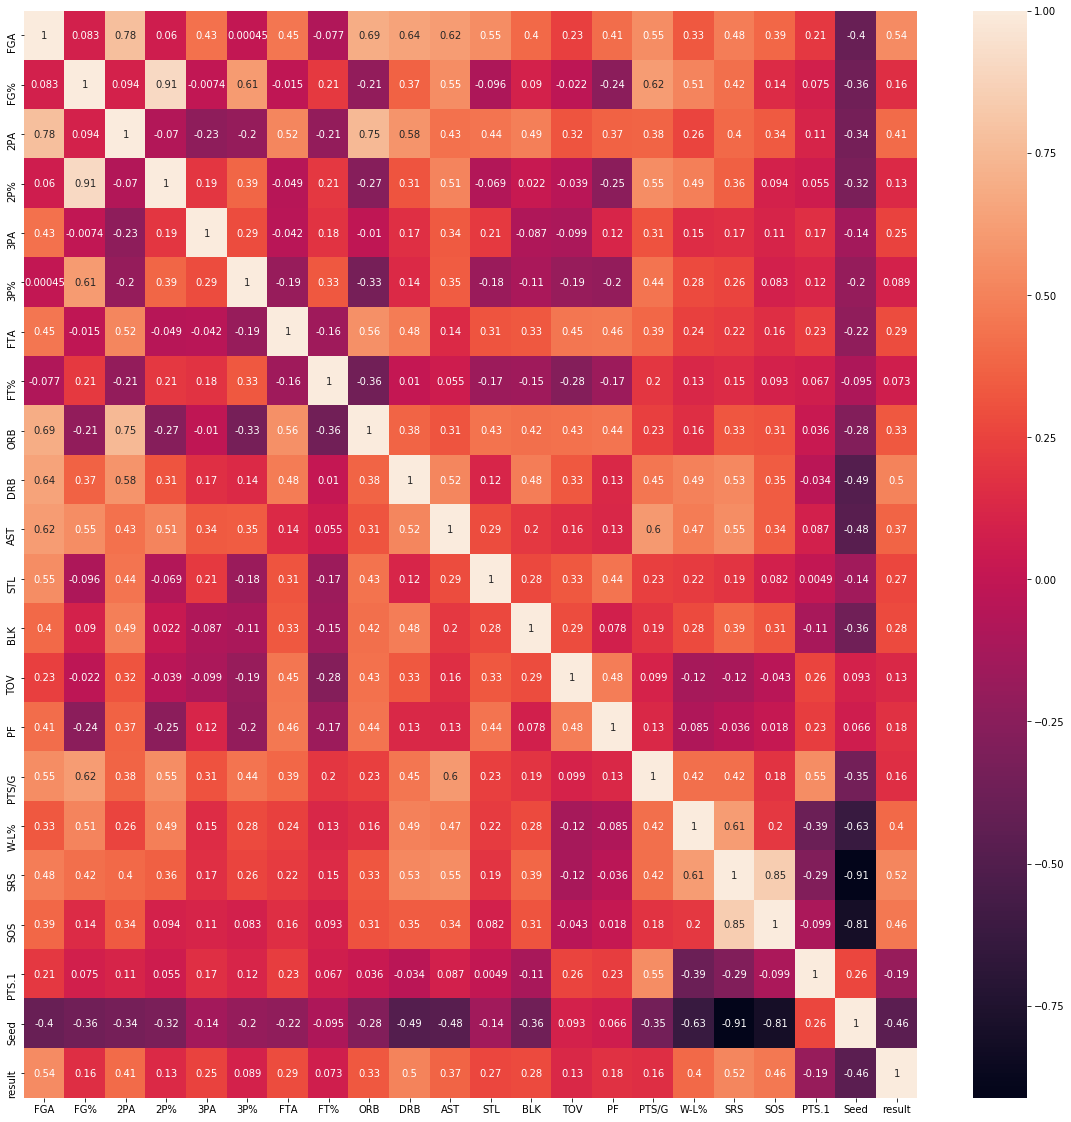

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
corr=data_matrix.corr()
ax=sns.heatmap(corr,annot=True)

Some notable results: <dir>
    * defensive rebounds are more correlated with wins than offensive rebounds
    * almost no correlation between FT% and Wins in NCAA tournament!
    * low correlation between 3P% and 3PA 
        + Perhaps this is something that can be accounted for.
        + Feature engineering could be useful - see what percentage of shots were 3P 

# Nueral Net

This is adapted from the TF example https://www.tensorflow.org/tutorials/keras/classification

In [202]:
import tensorflow as tf
from tensorflow import keras
nueral_net_data = data_matrix.copy()

In [203]:
from sklearn.model_selection import train_test_split
# split the data
Y_nn = nueral_net_data.iloc[: , -1]
X_nn = nueral_net_data.iloc[: , :-1]
x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, Y_nn, test_size=0.2)

### Build the Nueral Net

In [204]:

input_shape = (21,)  # The shape of the data. This cannot be changed.
num_categories = 2 # The number of labelled categories in our classification scheme. This cannot be changed.
hidden_units_list = [16, 64, 256]

# These are our layers
num_hidden_units = hidden_units_list[2] 
num_hidden_units_2 = hidden_units_list[2]
num_hidden_units_3 = hidden_units_list[2]
activation_list = ['sigmoid', 'relu', 'tanh'] # Different options of activation function
activation = activation_list[0]

nueral_net = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(num_hidden_units, activation=activation),
    keras.layers.Dropout(0.5) ,
    keras.layers.Dense(num_hidden_units_2, activation=activation),
    keras.layers.Dropout(0.25) ,

    keras.layers.Dense(num_categories, activation='softmax')
])

print(f"The model is built using {num_hidden_units} hidden units and a {activation} activation function")



The model is built using 256 hidden units and a sigmoid activation function


In [205]:
# adam helps get out of local optima
nueral_net.compile(optimizer='adam', # adam is an adaptive gradient optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

nueral_net.fit(x_train_nn, y_train_nn, epochs=30)

Train on 531 samples
Epoch 1/30
531/531 [==============================] - 0s 523us/sample - loss: 0.6148 - accuracy: 0.6591
Epoch 2/30
531/531 [==============================] - 0s 57us/sample - loss: 0.5481 - accuracy: 0.7514
Epoch 3/30
531/531 [==============================] - 0s 53us/sample - loss: 0.5408 - accuracy: 0.7608
Epoch 4/30
531/531 [==============================] - 0s 53us/sample - loss: 0.5333 - accuracy: 0.7646
Epoch 5/30
531/531 [==============================] - 0s 48us/sample - loss: 0.5262 - accuracy: 0.7815
Epoch 6/30
531/531 [==============================] - 0s 54us/sample - loss: 0.5284 - accuracy: 0.7627
Epoch 7/30
531/531 [==============================] - 0s 50us/sample - loss: 0.5200 - accuracy: 0.7759
Epoch 8/30
531/531 [==============================] - 0s 49us/sample - loss: 0.5123 - accuracy: 0.7910
Epoch 9/30
531/531 [==============================] - 0s 50us/sample - loss: 0.5030 - accuracy: 0.8041
Epoch 10/30
531/531 [==============================

In [206]:
test_loss, test_acc = nueral_net.evaluate(x_test_nn,  y_test_nn, verbose=2)

print('\nTest accuracy:', test_acc)

133/133 - 0s - loss: 0.5164 - accuracy: 0.7970

Test accuracy: 0.7969925


# Run the tournament

In [226]:


# to do:
    # fill out this list
    # decide what framework the teams should be in. 

ncaa_teams = {
    'south' : [
        'kansas' , 
        'san-diego-state' , 
        'maryland' , 
        'kentucky' , 
        'butler' , 
        'auburn' , 
        'west-virginia' , 
        'saint-marys-ca' , 
        'oklahoma' , 
        'texas-tech' , 
        'arizona-state' , 
        'purdue' , 
        'richmond' , 
        'tennessee' , 
        'rhode-island' , 
        'mississippi-state' 
        ] , 
        'east' : [
        'gonzaga' , 
        'florida-state' , 
        'louisville' , 
        'villanova' , 
        'penn-state' , 
        'iowa' , 
        'arizona' , 
        'houston' , 
        'louisiana-state' , 
        'xavier' , 
        'texas' , 
        'tulsa' , 
        'vermont' , 
        'belmont' , 
        'wright-state' , 
        'siena' 
        ]  ,
        'midwest' : [
        'baylor' , 
        'seton-hall' , 
        'duke' , 
        'oregon' , 
        'brigham-young' ,  # byu
        'colorado' , 
        'illinois' , 
        'indiana' , 
        'providence' , 
        'florida' , 
        'northern-iowa' , 
        'liberty' , 
        'akron' , 
        'yale' , 
        'radford' , 
        'hofstra' 
        ]  ,
        'west' : [
        'dayton' , 
        'michigan-state' , 
        'creighton' , 
        'ohio-state' , 
        'wisconsin' , 
        'michigan' , 
        'virginia' , 
        'marquette' , 
        'southern-california' , 
        'rutgers' , 
        'east-tennessee-state' , 
        'stephen-f-austin' , 
        'cincinnati' , 
        'wichita-state' , 
        'utah-state' , 
        'north-carolina-central' 
        ]
    
    }

In [236]:


## build the tournament

class tournament():
    
   
    def __init__(self , teams , model ):
        self.origional = teams
        self.teams = copy.deepcopy(teams)               # this needs to be a list of dictionary's south , west, midwest , east, teams in seed order
        self.games = {}
        self.rounds = []
        self.round_32 = []
        self.round_16 = []
        self.round_8 = []
        self.final_four = [ 0 , 0 , 0 , 0]
        self.finals = None
        self.champion = None
        self.model = model
         
    # this method will play the entire tournament by alternating playing make_games and play_round
    def play_tournament(self):
        while self.champion == None:
            self.make_games()
            self.play_round()

    # this method resets the tournament, but uses the origional set of teams.
    def reset(self):
        self.teams = self.origional
        self.games = {}
        self.rounds = []
        self.round_32 = []
        self.round_16 = []
        self.round_8 = []
        self.final_four = [ 0 , 0 , 0 , 0]
        self.finals = None
        self.champion = None
        self.model = model
        
        
    # this method builds the next round of games using the results of the play_round() method
    def make_games(self):
        # this makes all the games for each region - if only one team left: it will return no games
        for region in self.teams:
            reg_teams = self.teams[region] # this get's the teams and puts them into a list
            games = []
            for i in range(len(reg_teams) // 2):
                games += [game(reg_teams[i] , reg_teams[(i + 1) * -1]  , model = self.model , team_data = tournament_stats)]
            self.games[region] = games

    # The following method will play a single round of the tournamnet
    # it is important to note that it considers the final four, and championship as one round
    # At the conclusion, it sets the self.teams to be just the winners. keeping track of each
    # round in self.rounds
    # the final four / finals round returns self.champion as the overall winner
    def play_round(self):
        
        games_played = []
        counter = 0        
        for region in self.games:
            l_games = list(self.games[region])
            l_teams = list(self.teams[region])
            if len(l_teams) != 1:
                winners = []
                
                for g in l_games:
                    g.play_model()
                    #game.print_results
                    winners += [g.winner]
                    games_played += [g]
                # update the teams in the tournament
                self.teams[region] = winners

            else:
                # make the final four
                self.final_four[counter] = self.teams[region][0]
                # play the final four  # this needs to be the correct pairing
                        # update the counter
            counter += 1
        # update the rounds
        if games_played != []:
            self.rounds += [games_played] 
        if self.final_four[0] != 0:
            game1 = game(self.final_four[0] , self.final_four[1], model = self.model , team_data = tournament_stats)
            game1.play_even()
            game2 = game(self.final_four[2] , self.final_four[3], model = self.model , team_data = tournament_stats)
            game2.play_model()
            
            # put winners in finals 
            self.finals = [game1.winner , game2.winner]
                
            self.rounds += [ [game1 , game2] ]
                
            # play the final
            final_game = game(self.finals[0] , self.finals[1], model = self.model , team_data = tournament_stats)
                
            final_game.play_model()
            self.champion = final_game.winner
            self.rounds += [[final_game]]


    def short_describe(self):
        final_four = self.rounds[-2]
        finals = self.rounds[-1]
        
        print("In the Final Four,  ")
        for game in final_four:
            game.print_results()
        print("In the finals,  ")
        finals[-1].print_results()
        
    def give_results(self):
        round_count = 1
        for r in self.rounds:
            print("In round " , round_count)
            round_count += 1
            for game in r:
                game.print_results()
            print("   ")
            
        
        
class game():
    
    def __init__(self, team1 , team2 , model = None , team_data = None):
        self.team_one = team1
        self.team_two = team2
        self.model = model
        self.team_data = team_data
        self.winner = None
        self.loser = None
        

    def print_results(self):
        print(self.winner , " will beat " , self.loser)
        
    # this method plays a game assuming each team has equal chance of winning. 
    def play_even(self):
        choice = np.random.uniform()
        if choice <= 0.5:
            self.winner = self.team_one
            self.loser  = self.team_two
        else:
            self.winner = self.team_two
            self.loser  = self.team_one
            
    def play_model(self):
        model = self.model
        # need to build the feature vector
        s1 = self.team_data[self.team_data["Team"] == self.team_one ]
        s2 = self.team_data[self.team_data["Team"] == self.team_two ]
        s1 = s1.drop(["Team" ] , axis = 1)
        s2 = s2.drop(["Team" ] , axis = 1)
        # need to reset their indices
        s2 = s2.reset_index(drop=True)
        s1 = s1.reset_index(drop=True)   
        # subtract the two stat sets
        feature_vector = s1.sub(s2) 
        # get prediction
        choice = model.predict(feature_vector)   # if you import decision tree
        #choice = model.predict_classes(feature_vector)  # if you import nueral net
        if choice == 1:
            self.winner = self.team_one
            self.loser  = self.team_two
        else:
            self.winner = self.team_two
            self.loser  = self.team_one
            

In [237]:
t = tournament(ncaa_teams , model)
t.play_tournament(
t.short_describe()
t.give_results()

In the Final Four,  
purdue  will beat  houston
duke  will beat  wisconsin
In the finals,  
duke  will beat  purdue
In round  1
kansas  will beat  mississippi-state
san-diego-state  will beat  rhode-island
maryland  will beat  tennessee
richmond  will beat  kentucky
purdue  will beat  butler
arizona-state  will beat  auburn
west-virginia  will beat  texas-tech
oklahoma  will beat  saint-marys-ca
gonzaga  will beat  siena
florida-state  will beat  wright-state
belmont  will beat  louisville
vermont  will beat  villanova
penn-state  will beat  tulsa
texas  will beat  iowa
xavier  will beat  arizona
houston  will beat  louisiana-state
baylor  will beat  hofstra
seton-hall  will beat  radford
duke  will beat  yale
akron  will beat  oregon
brigham-young  will beat  liberty
colorado  will beat  northern-iowa
florida  will beat  illinois
providence  will beat  indiana
dayton  will beat  north-carolina-central
michigan-state  will beat  utah-state
creighton  will beat  wichita-state
ohio-state